<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/modelisation%20app/test%20(k_mens%205groupes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [11]:
Cl = '/content/AXEAPP.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [12]:
apprentissage

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,1,0.001424,0.031177,-0.059472,-3.681616,-2.401045,-0.173420
1,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
2,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
3,0,-0.001565,0.007444,0.052511,-0.575102,-0.089102,-0.036805
4,0,-0.001238,0.010596,0.047796,-1.674400,0.216223,0.038151
...,...,...,...,...,...,...,...
198,1,0.002694,-0.011021,-0.107134,-1.678789,-0.626739,-0.093039
199,1,0.001341,-0.016060,-0.078564,-1.584375,0.421137,-0.297170
200,1,0.001998,-0.013530,-0.123163,-1.309588,-0.722200,-0.279362
201,1,-0.000923,-0.014214,0.010676,-1.404706,1.443951,0.121188


In [13]:
Cl2 = '/content/AXETEST.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [14]:
test

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,0,-0.000973,0.011465,0.090826,-2.054473,-1.159648,0.023911
1,1,-0.005224,0.007407,-0.003400,-1.623037,-1.119609,-0.050821
2,1,-0.005224,0.007407,-0.003400,-1.623037,-1.119609,-0.050821
3,1,0.001292,0.013119,-0.089037,-2.733886,-1.084109,-0.159765
4,0,-0.002151,0.004945,0.004891,-0.312813,0.250637,0.239744
5,0,-0.002095,0.004945,0.010478,-0.515774,0.250637,0.235117
6,0,0.000653,0.005613,0.019444,0.128193,-1.015083,-0.119206
7,0,0.001841,0.004177,-0.033974,0.553651,-1.046322,0.186320
8,1,-0.001734,0.005542,0.098032,0.592257,0.701975,0.190069
9,0,-0.001089,0.005474,0.078806,0.240400,0.770757,0.095475


In [15]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

In [131]:
Classifier = LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11)

In [132]:
Classifier.fit(X_app,Y_app)

LogisticRegression(class_weight='balanced', random_state=11)

In [133]:
preds = Classifier.predict(X_test)

In [134]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [135]:
cf_matrix = confusion_matrix(Y_test, preds)
print(cf_matrix)

[[22  9]
 [ 7 13]]


In [137]:
###Recall
def recall(y_test, preds):
  recall=recall_score(y_test, preds)
  return recall
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### MCC
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### sensibilite
def sensibilite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_test, preds):
  value = cohen_kappa_score(y_test, preds)
  return value
### balancedacc
def balancedacc(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  value = (sen + spe)/2
  return value
def présicion_positive(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [138]:
MCC(Y_test, preds)

0.3545672989166052

In [139]:
recall(Y_test, preds)

0.65

In [140]:
sensibilite(Y_test, preds)

0.65

In [141]:
specifite(Y_test, preds)

0.7096774193548387

In [142]:
présicion_négative(Y_test, preds)

0.7586206896551724

In [143]:
présicion_positive(Y_test, preds)

0.5909090909090909

In [144]:
balancedacc(Y_test, preds)

0.6747648902821317

In [145]:
kappa(Y_test, preds)

0.3534072900158479

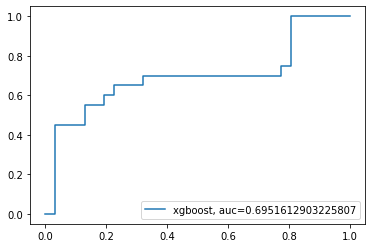

In [146]:
y_pred_proba = Classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()